In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generación de números pseudo-aleatorios

## Elementos
* $S$ conjunto de estados.
* $f$ definida de $S$ en $S$.
* $\mu$ distribución de probabilidad en $S$
* $U$ espacio de salida.
* $g$ definida de $S$ en $U$.

## Algoritmo
1. Incialización: tomamos $S_0$ según la distribución $\mu$ de $S$ y t = 1. $S_0$ se denomina la semilla del generador.
2. Transición: $S_t = f(S_{t-1})$.
3. Salida: $U_t = g(S_t)$.
4. Repetir: volver al paso 2.

# Generadores basados en congruencias lineales

* $S = \{0, ..., m-1\}$, $\vert S\vert = m$, m suficientemente grande.
* $S_i \in S$.
* $S_t = f(S_{t-1}) = (aS_{t-1} + c) \textrm{ mod } m$.
* $U_t = g(S_t) = S_t/m$.

In [2]:
def gen_cong_aleatorio(s_0, n, a, c, m):
  s_i = s_0
  results = []
  for t in range(n):
    s_t = (a*s_i + c) % m
    results.append(s_t)
    s_i = s_t
  
  return results

## Ejemplo 1

In [53]:
a1 = 7**5
c1 = 0
m1 = 2**31-1

random = gen_cong_aleatorio(3.0, 100000, a1, c1, m1)

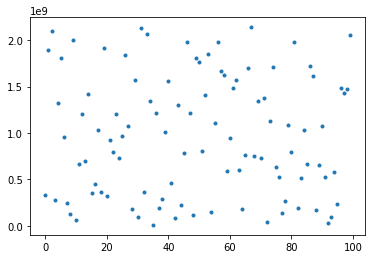

In [54]:
plt.plot(random[400:500], '.')

In [55]:
U = np.array(random)/m1

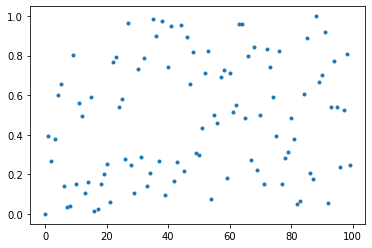

In [56]:
plt.plot(U[:100], '.')

In [57]:
U

array([2.34791078e-05, 3.94613364e-01, 2.66815967e-01, ...,
       5.50864710e-01, 3.83177570e-01, 6.54231208e-02])

(array([2029., 1975., 2032., 1919., 1995., 1990., 1932., 1957., 2023.,
        1983., 1990., 2022., 1939., 1962., 2065., 1987., 2035., 1954.,
        1955., 2000., 2016., 2081., 2078., 2000., 2032., 2012., 1963.,
        2043., 2081., 2074., 1982., 2024., 1989., 1992., 2072., 1974.,
        2029., 1972., 1967., 2030., 2047., 1929., 2006., 2002., 1958.,
        1985., 1921., 2005., 2022., 1970.]),
 array([1.17109157e-05, 2.00114735e-02, 4.00112360e-02, 6.00109985e-02,
        8.00107611e-02, 1.00010524e-01, 1.20010286e-01, 1.40010049e-01,
        1.60009811e-01, 1.80009574e-01, 2.00009336e-01, 2.20009099e-01,
        2.40008861e-01, 2.60008624e-01, 2.80008386e-01, 3.00008149e-01,
        3.20007912e-01, 3.40007674e-01, 3.60007437e-01, 3.80007199e-01,
        4.00006962e-01, 4.20006724e-01, 4.40006487e-01, 4.60006249e-01,
        4.80006012e-01, 5.00005774e-01, 5.20005537e-01, 5.40005300e-01,
        5.60005062e-01, 5.80004825e-01, 6.00004587e-01, 6.20004350e-01,
        6.40004112e-01, 

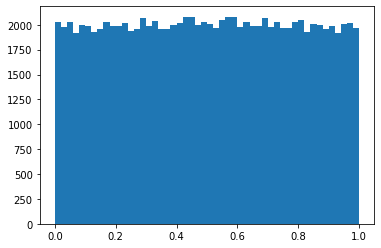

In [58]:
plt.hist(U, bins=50)

## Ejemplo 2

In [59]:
a2 = 5
c2 = 21
m2 = 2**83-1

random = gen_cong_aleatorio(100.0, 100000, a2, c2, m2)

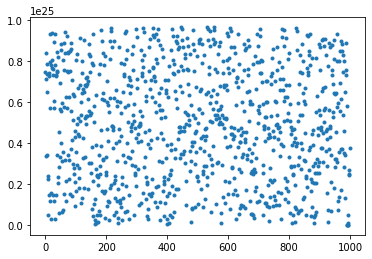

In [60]:
plt.plot(random[86000:87000], '.')

In [61]:
U2 = np.array(random)/m2

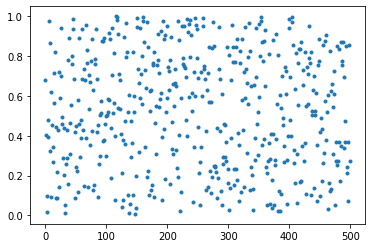

In [62]:
plt.plot(U2[74000:74500], '.')

# Pruebas de aleatoriedad

## Kolmogorov - Smirnof

In [63]:
from scipy.stats import kstest

In [64]:
kstest(U, 'uniform')

KstestResult(statistic=0.002847324073201707, pvalue=0.3921746108576311)

In [65]:
U2 = [float(u) for u in U2]

In [66]:
kstest(U2, 'uniform')

KstestResult(statistic=0.0038695083920783357, pvalue=0.10009882963375233)

## Chi-Cuadrado

In [20]:
a1 = 7**5
c1 = 0
m1 = 2**31-1

random1a = np.array(gen_cong_aleatorio(3.0, 1000, a1, c1, m1))/m1
random1b = np.array(gen_cong_aleatorio(17.0, 1000, a1, c1, m1))/m1

In [21]:
from scipy.stats import chi2_contingency

In [22]:
results = chi2_contingency([random1a, random1b])[0:3]

In [23]:
results

(173.45057905237144, 1.0, 999)

In [24]:
a2 = 5
c2 = 21
m2 = 2**83-1

random2a = np.array(gen_cong_aleatorio(10735.0, 100000, a2, c2, m2))/m2
random2b = np.array(gen_cong_aleatorio(3219.0, 100000, a2, c2, m2))/m2

In [25]:
results = chi2_contingency([random2a, random2b])[0:3]

In [26]:
results

(18133.117198951368, 1.0, 99999)

## Gráfica

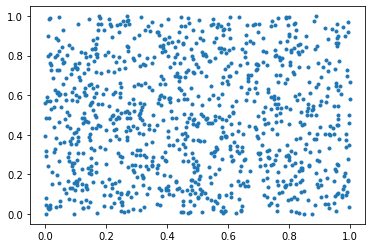

In [30]:
plt.plot(random1a[:-1], random1a[1:], '.')

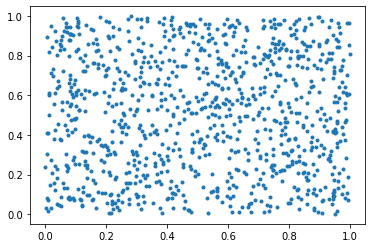

In [31]:
plt.plot(random1b[:-1], random1b[1:], '.')

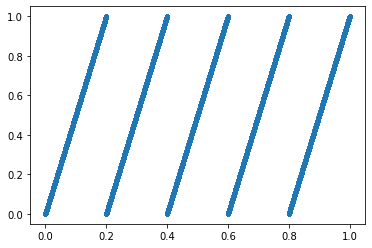

In [32]:
plt.plot(random2a[:-1], random2a[1:], '.')

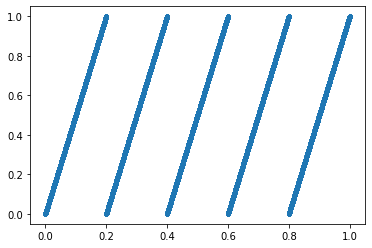

In [33]:
plt.plot(random2b[:-1], random2b[1:], '.')